# <font color=yellow>Transfer Learning</font> for Font-type Recognition with [Keras](https://keras.io/)</font>

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" alt="Keras logo" height="100" width="250"> 

---

<font size=4 >Summer Seminar:</font> <font size=4 color= orange>Practical Introduction to Deep Learning & Keras</font>

 <img src="https://pbs.twimg.com/profile_images/969243109208018946/w2GzDfiC_400x400.jpg" alt="IPTC" height="50" width="50"> 
 ## * [IPTC](https://iptc.upm.es/) and [MSTC](http://mstc.ssr.upm.es/big-data-track)
 
---
---


In [1]:
import keras

from keras.utils import to_categorical

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

      
print('Keras version: ',keras.__version__)

Using TensorFlow backend.


Keras version:  2.2.4


## <font color= #00cc00>Next cells load the Font Type dataset:</font>


In [0]:
"""
Load and data
"""

import os
from six.moves import urllib

file_url = 'https://github.com/bloolizard/PlayWithTensorFlow/raw/master/data_with_labels.npz'
file_name = 'data_with_labels.npz'

if not os.path.exists(file_name):
    urllib.request.urlretrieve(file_url, file_name)
    
    
# Load data
data = np.load('data_with_labels.npz')

images = data['arr_0']/255.
labels = data['arr_1']

onehot= to_categorical(labels, num_classes=len(np.unique(labels)))

## Preparing Train/Test Data :
- ### Random Permutation! + split data into training / validation

In [0]:
# Split data into training (90%) and validation (10%)
np.random.seed(100)

indices = np.random.permutation(images.shape[0])

valid_cnt = int(images.shape[0] * 0.1)

test_idx, training_idx = indices[:valid_cnt],\
                         indices[valid_cnt:]
  
test_ori, train_ori = images[test_idx,:],\
              images[training_idx,:]
  
onehot_test, onehot_train = onehot[test_idx,:],\
                        onehot[training_idx,:]


In [5]:
train_ori=train_ori.reshape([-1,train_ori.shape[1],train_ori.shape[2]])
test_ori=test_ori.reshape([-1,test_ori.shape[1],test_ori.shape[2]])

print('Train images ORIGINAL shape=', train_ori.shape , '\nTest images ORIGINAL shape=', test_ori.shape)

Train images ORIGINAL shape= (2511, 36, 36) 
Test images ORIGINAL shape= (279, 36, 36)


#<font color=yellow> Resize your images to have: 3 channels (RGB) and same dimensions as the Pre-trained network you are going to use
  
  

In [0]:
from skimage.transform import resize
from skimage.color import gray2rgb 

# 224 x 224 for VGG
hori=224
vert=224

train = np.zeros((train_ori.shape[0],hori,vert,3))
test = np.zeros((test_ori.shape[0],hori,vert,3))

for n,i in enumerate(train_ori):
    new_img = gray2rgb(train_ori[n,:,:])
    train[n,:,:,:] = resize(new_img, train.shape[1:], anti_aliasing=True)
    
    

for n,i in enumerate(test_ori):
    new_img = gray2rgb(test_ori[n,:,:])
    test[n,:,:,:] = resize(new_img, test.shape[1:], anti_aliasing=True)
    
    

In [7]:
print('Train images shape=', train.shape , '\nTest images shape=', test.shape)

Train images shape= (2511, 224, 224, 3) 
Test images shape= (279, 224, 224, 3)


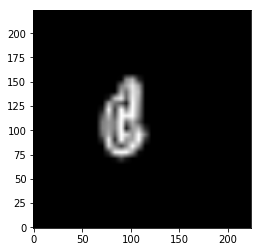

In [8]:
plt.imshow(train[2000,:,:,:], origin='lower')

---
<font size=6 color=yellow>BUILD the "transfer learning" Model:</font><br>
- <font size=4 > We can try with many pre-trained Models, BUT consider the limitation of our approach: **"Spectrogram-like" images are similar than general images?**</font><br><br>
-- <font size=4>We will try a simple Model</font><font size=4 color='orange'> **VGG16**</font><br>
-- <font size=4> ...but there are many : </font> **Xception, InceptionV3, or ResNet50**

---

In [9]:
from keras import applications

# In this way input tensor shape is forced
# to be (224, 224, 3)

vgg_model = applications.VGG16(weights='imagenet', include_top=True)


################## Change the VGG model ###################################################################
#vgg_model = applications.xception.Xception(include_top=True, weights='imagenet', input_tensor=None, input_shape=(299, 299, 3), pooling=None, classes=1000)
#vgg_model = applications.inception_v3.InceptionV3(include_top=True, weights='imagenet', input_tensor=None, input_shape=(299, 299, 3), pooling=None, classes=1000)
#vgg_model = applications.resnet50.ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=(224, 224, 3), pooling=None, classes=1000)


W0709 18:06:15.082915 140538124560256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0709 18:06:15.111277 140538124560256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 18:06:15.115479 140538124560256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0709 18:06:15.151134 140538124560256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0709 18:06:17.027412 140538124560256 deprecation_wrapp

In [10]:
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

- ## We can remove the last added layer in a Sequential model by calling .pop():

In [11]:
# Note that if you call it several times you remove the last after the previous 

vgg_model.layers.pop()
vgg_model.layers.pop()
vgg_model.layers.pop()


In [12]:
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

---
---

## <font size= 6 color=yellow>Now we use KERAS API</font>

---


## We can add some more layers (we only add one softmax):
##- `vgg_model.layers[-1].output` is the last output of VGG16 (after pop-ing out the last layers)


In [13]:
import keras
from keras.layers import Dense, Dropout
from keras.models import Model


x = Dropout(rate=0.4)(vgg_model.layers[-1].output)
x = Dense(64, activation='relu')(x)  # new softmax layer
predictions = Dense(5, activation='softmax', name='softmax_new1')(x)  # new softmax layer
transfer_model = Model(input=vgg_model.input, output=predictions)

W0709 18:06:39.501881 140538124560256 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("so...)`
  if __name__ == '__main__':


In [14]:
transfer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# We can <font color=red>Freeze</font> Layers <font color=green> ... or NOT</font>

In [0]:
# Make sure that the pre-trained bottom layers are not trainable

for layer in vgg_model.layers:
        layer.trainable = False

# COMPILE... as usual

In [16]:
import keras


transfer_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='rmsprop',
              metrics=['accuracy'])

W0709 18:06:56.844072 140538124560256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



## You can check which layers are trainable...

In [17]:
for i in range(1, len(transfer_model.layers)):
    print('Layer: ' , i, 'Trainable: ', transfer_model.layers[i].trainable)


Layer:  1 Trainable:  False
Layer:  2 Trainable:  False
Layer:  3 Trainable:  False
Layer:  4 Trainable:  False
Layer:  5 Trainable:  False
Layer:  6 Trainable:  False
Layer:  7 Trainable:  False
Layer:  8 Trainable:  False
Layer:  9 Trainable:  False
Layer:  10 Trainable:  False
Layer:  11 Trainable:  False
Layer:  12 Trainable:  False
Layer:  13 Trainable:  False
Layer:  14 Trainable:  False
Layer:  15 Trainable:  False
Layer:  16 Trainable:  False
Layer:  17 Trainable:  False
Layer:  18 Trainable:  False
Layer:  19 Trainable:  False
Layer:  20 Trainable:  True
Layer:  21 Trainable:  True
Layer:  22 Trainable:  True


In [18]:
transfer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# TRAIN...

# 3.   **Fit your model**. Train the model using data.

In [19]:
# history to analyze training history evolution

# validation_data allows to see evaluation on test while training
history=transfer_model.fit(train, onehot_train,
         epochs=100,
         batch_size=128,
         validation_data=(test, onehot_test),
         verbose=1)

W0709 18:07:40.871686 140538124560256 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2511 samples, validate on 279 samples
Epoch 1/100
2511/2511 [==============================] - 44s 17ms/step - loss: 4.2230 - acc: 0.3867 - val_loss: 0.8161 - val_acc: 0.8065
Epoch 2/100
2511/2511 [==============================] - 26s 10ms/step - loss: 0.8659 - acc: 0.7053 - val_loss: 0.5166 - val_acc: 0.8853
Epoch 3/100
2511/2511 [==============================] - 26s 10ms/step - loss: 0.5686 - acc: 0.7742 - val_loss: 0.3642 - val_acc: 0.8996
Epoch 4/100
2511/2511 [==============================] - 26s 10ms/step - loss: 0.4202 - acc: 0.8590 - val_loss: 0.2343 - val_acc: 0.9211
Epoch 5/100
2511/2511 [==============================] - 26s 10ms/step - loss: 0.2719 - acc: 0.8949 - val_loss: 0.5327 - val_acc: 0.7885
Epoch 6/100
2511/2511 [==============================] - 26s 10ms/step - loss: 0.2743 - acc: 0.9032 - val_loss: 0.1266 - val_acc: 0.9749
Epoch 7/100
2511/2511 [==============================] - 26s 10ms/step - loss: 0.1948 - acc: 0.9431 - val_loss: 0.1929 - val_acc: 0

## 4.   **Make predictions**. Use the model to generate predictions on new data.

In [0]:
# Check accuracy on train set

loss_train, accuracy_train = transfer_model.evaluate(train, onehot_train, batch_size=128)


print('\nTraining Accuracy=', accuracy_train)

# Check accuracy on test set

loss, accuracy = transfer_model.evaluate(test, onehot_test, batch_size=128)


print('\nTest Accuracy=', accuracy)

2511/2511 [==============================] - 0s 31us/step

Training Accuracy= 0.997610513739546
279/279 [==============================] - 0s 57us/step

Test Accuracy= 0.9605734743525051


In [0]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Train Accuracy:  0.97
Test_Accuracy:  0.96


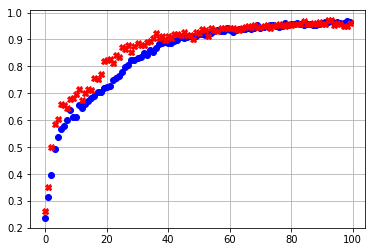

In [0]:
print('Train Accuracy: ',np.round(history.history['acc'][-1],2))
print('Test_Accuracy: ',np.round(history.history['val_acc'][-1],2))

# Plot the accuracy curves
plt.plot(history.history['acc'],'bo')
plt.plot(history.history['val_acc'],'rX')
plt.grid()

# Get predictions / probabilities ...

In [0]:
pred_probabilities= transfer_model.predict(test)

print('First Five Probs.:\n',pred_probabilities[0:5])

print('\n\nFirst Five Classes:\n',onehot_test[0:5])

First Five Probs.:
 [[7.8766112e-07 6.7865886e-03 4.8495163e-09 4.1593908e-04 9.9279672e-01]
 [6.2605934e-05 9.9991262e-01 1.4085857e-05 1.0650496e-05 2.7667717e-08]
 [7.1720763e-12 7.4203764e-03 7.9724167e-13 1.7823913e-04 9.9240136e-01]
 [4.3611312e-01 1.2774734e-05 5.6387413e-01 3.8314893e-11 3.1554670e-12]
 [4.5873236e-27 2.6052227e-04 7.0993967e-29 9.9973947e-01 5.9503789e-09]]


First Five Classes:
 [[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


## Confusion Matrix

In [0]:
!pip install pandas_ml

     |████████████████████████████████| 102kB 6.1MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


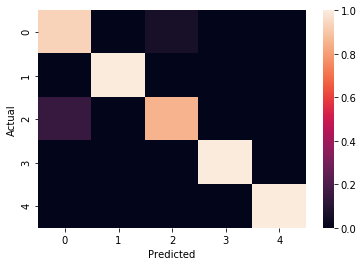

In [0]:
from pandas_ml import ConfusionMatrix

ConfMatrix=ConfusionMatrix(np.argmax(onehot_test,1), np.argmax(pred_probabilities,1))

ConfMatrix.plot(normalized=True,backend='seaborn')

In [0]:
ConfMatrix.print_stats()

/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/bcm.py:330: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


Confusion Matrix:

Predicted   0   1   2   3   4  __all__
Actual                                
0          57   0   4   0   0       61
1           0  71   0   0   0       71
2           7   0  41   0   0       48
3           0   0   0  43   0       43
4           0   0   0   0  56       56
__all__    64  71  45  43  56      279


Overall Statistics:

Accuracy: 0.9605734767025089
95% CI: (0.9305513739401573, 0.9801568421799388)
No Information Rate: ToDo
P-Value [Acc > NIR]: 3.4059657807937456e-142
Kappa: 0.9503003999935223
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                        0        1  ...         3         4
Population                                   279      279  ...       279       279
P: Condition positive                         61       71  ...        43        56
N: Condition negative                        218      208  ...       236       223
Test outcome positive                         64       71  ...        43        56
Test o

Confusion Matrix:
 [[57  0  4  0  0]
 [ 0 71  0  0  0]
 [ 7  0 41  0  0]
 [ 0  0  0 43  0]
 [ 0  0  0  0 56]]


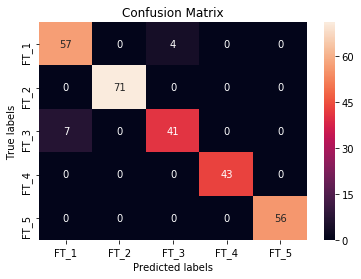

In [0]:
import seaborn as sns

from sklearn.metrics import confusion_matrix as cm

ConfMatrix=cm(np.argmax(onehot_test,1), np.argmax(pred_probabilities,1))

print('Confusion Matrix:\n',ConfMatrix)

ax= plt.subplot()
sns.heatmap(ConfMatrix, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['FT_1', 'FT_2','FT_3','FT_4','FT_5'])
ax.yaxis.set_ticklabels(['FT_1', 'FT_2','FT_3','FT_4','FT_5']);